   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

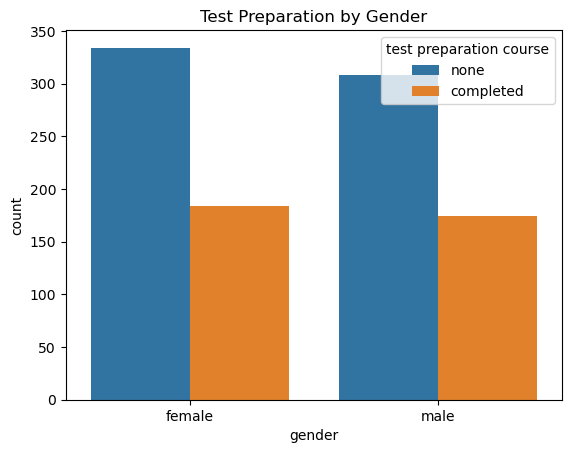

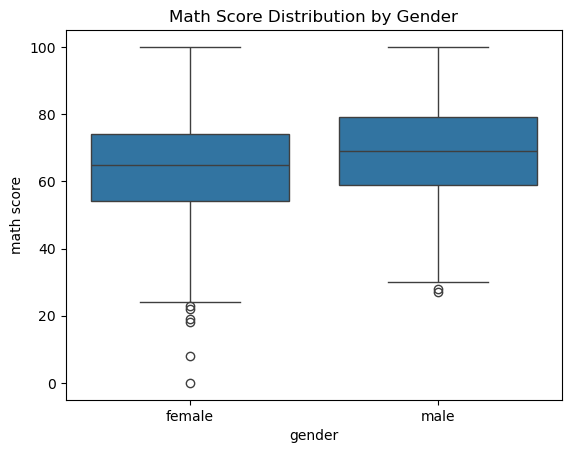

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.94      0.99      0.97       189

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.89      0.94      0.92       200



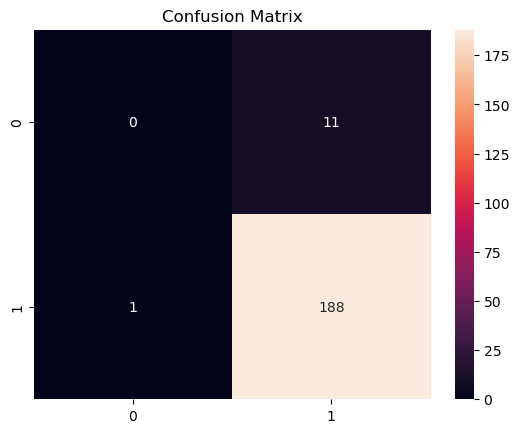

In [8]:
# Student Performance Prediction Project

# 📦 Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📥 Step 2: Load Dataset
df = pd.read_csv("StudentsPerformance.csv")  # upload this file from Kaggle manually

# 🧹 Step 3: Clean and Understand Data
print(df.head())
print(df.info())
print(df.describe())

# 🎨 Step 4: EDA – Data Visualization
sns.countplot(x='gender', hue='test preparation course', data=df)
plt.title("Test Preparation by Gender")
plt.show()

sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score Distribution by Gender")
plt.show()

# 📌 Step 5: Label Encoding for Categorical Variables
le = LabelEncoder()
for col in ['gender', 'race/ethnicity', 'parental level of education', 
            'lunch', 'test preparation course']:
    df[col] = le.fit_transform(df[col])

# 🎯 Step 6: Create Target Column
df['pass_math'] = df['math score'].apply(lambda x: 1 if x >= 40 else 0)

# 🛠 Step 7: Split Data
X = df.drop(columns=['math score', 'pass_math', 'reading score', 'writing score'])
y = df['pass_math']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 8: Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 📊 Step 9: Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [3]:
print(y_pred[:10])


[1 1 1 1 1 1 1 1 1 1]


In [6]:
print(y_pred[:350])


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
# Predict for a new student: [gender, race, parent_education, lunch, test_prep]
# Assume: male (1), group B (1), bachelor's (2), standard lunch (1), completed prep (1)
new_student = [[1, 1, 2, 1, 1]]
prediction = model.predict(new_student)
print("Predicted Pass Status:", "Pass" if prediction[0] == 1 else "Fail")


Predicted Pass Status: Pass


C:\Users\devra\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
